# Exploratory Data Analysis for Data Analyst in India

In [1]:
# Importing the necessary libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading dataset from Hugging Face and converting to a pandas DataFrame
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Converting the 'job_posted_date' column to datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting 'job_skills' from stringified lists to actual Python lists
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

In [2]:
# Defining the target country for job filtering
v_job_country = 'India'

# Defining the target job title for analysis
v_job_title = 'Data Analyst'

# Defining the number of top skills to include in the analysis
v_job_skills = 10

In [3]:
# Filtering the dataset for jobs located in the target country
df_Ind = df[df['job_country'] == v_job_country].copy()

# Further filtering the dataset for jobs with the target title in the target country
df_DA_Ind = df[
    (df['job_country'] == v_job_country) & 
    (df['job_title_short'] == v_job_title)
].copy()

In [4]:
# Expanding the job skills column so each skill gets its own row (for all jobs in the target country)
df_Ind_explode = df_Ind.explode('job_skills')

# Expanding the job skills column so each skill gets its own row (for target job title in the target country)
df_DA_Ind_explode = df_DA_Ind.explode('job_skills')

### What are the top skills required for Data Analyst role?

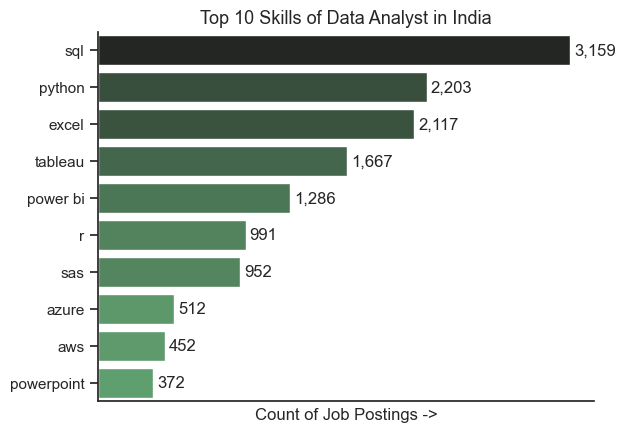

In [5]:
# Grouping and counting the frequency of each skill for the selected job title and country
DA_skill_count = df_DA_Ind_explode.groupby('job_skills').size().sort_values(ascending=False).head(v_job_skills).to_frame(name='skill_count')

# Setting Seaborn visual theme
sns.set_theme(style='ticks')

# Creating a horizontal bar plot for the top job skills
sns.barplot(
    data=DA_skill_count,
    x='skill_count',
    y='job_skills',
    hue='skill_count',                  # Using skill count as hue for color intensity
    palette='dark:g_r'                  # Dark green gradient palette
)

# Hiding x-axis tick values
plt.xticks([])

# Removing the legend since it's redundant here
plt.legend().remove()

# Adding skill count labels next to each bar
for i, txt in enumerate(DA_skill_count['skill_count']):
    plt.text(DA_skill_count['skill_count'].iloc[i] + 25, i, f'{txt:,}', va='center')  # Placing text slightly outside the bar

# Adding title and axis labels
plt.title(f"Top {v_job_skills} Skills of {v_job_title} in {v_job_country}", fontsize=13)
plt.xlabel("Count of Job Postings ->")
plt.ylabel("")

# Removing top and right borders from the plot
sns.despine()

# Displaying the final plot
plt.show()

### Which companies are hiring the most Data Analyst in India?

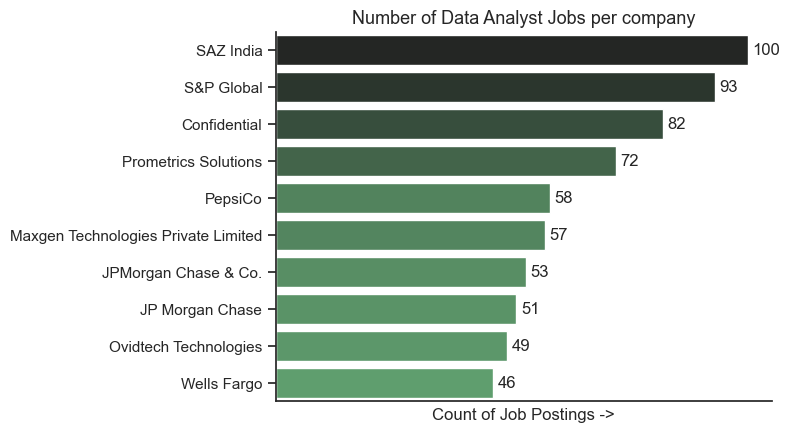

In [6]:
# Counting the number of job postings per company for the selected job title and country
DA_top_companies = df_DA_Ind['company_name'].value_counts().sort_values(ascending=False).head(10).to_frame(name='job_count')

# Setting Seaborn visual theme
sns.set_theme(style='ticks')

# Creating a horizontal bar plot for top companies hiring the selected job title
sns.barplot(
    data=DA_top_companies,
    x='job_count',
    y='company_name',
    hue='job_count',             # Coloring bars based on job count
    palette='dark:g_r'           # Using a dark green gradient color palette
)

# Removing legend since it duplicates bar information
plt.legend().remove()

# Hiding x-axis tick values
plt.xticks([])

# Adding job count labels to the right of each bar
for i, count in enumerate(DA_top_companies['job_count']):
    plt.text(DA_top_companies['job_count'].iloc[i] + 1, i, f"{count:,}", va='center')  # Slight right offset for visibility

# Setting title and axis labels
plt.title(f"Number of {v_job_title} Jobs per company", fontsize=13)
plt.xlabel('Count of Job Postings ->')
plt.ylabel('')

# Removing top and right plot borders
sns.despine()

# Displaying the plot
plt.show()

### Which cities or locations have the highest demand for Data Analyst?

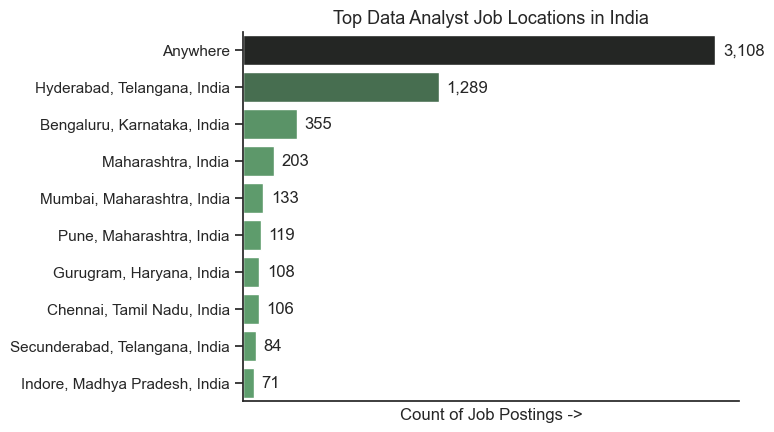

In [7]:
# Replacing 'India' with 'Anywhere' in the job location column
df_DA_Ind['job_location'] = df_DA_Ind['job_location'].replace('India', 'Anywhere')

# Getting the top job locations and how many jobs each has
DA_top_locations = df_DA_Ind['job_location'].value_counts().head(v_job_skills).to_frame(name='job_count')

# Setting the style for the plot
sns.set_theme(style='ticks')

# Making a bar chart for the most common job locations
sns.barplot(
    data=DA_top_locations,
    x='job_count',
    y='job_location',
    hue='job_count',           # Color based on number of jobs
    palette='dark:g_r'         # Using dark green colors
)

# Removing the extra legend
plt.legend().remove()

# Hiding the numbers on the x-axis
plt.xticks([])

# Adding job count numbers next to each bar
for i, count in enumerate(DA_top_locations['job_count']):
    plt.text(DA_top_locations['job_count'].iloc[i] + 50, i, f"{count:,}", va='center')  # Slightly to the right of each bar

# Adding title and labels to the plot
plt.title(f"Top {v_job_title} Job Locations in {v_job_country}", fontsize=13)
plt.xlabel('Count of Job Postings ->')
plt.ylabel('')

# Removing the top and right border lines of the chart
sns.despine()

# Showing the final plot
plt.show()

### How common is Work-from-Home and Do companies require specific degrees for Data Analyst role?

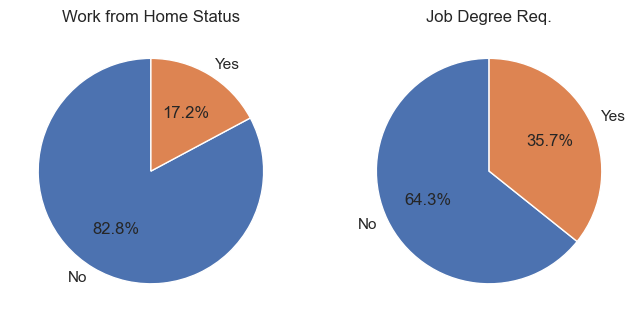

In [8]:
# Creating a dictionary to rename columns for easier understanding in plots
dict_columns = {
    'job_work_from_home': 'Work from Home Status',
    'job_no_degree_mention': 'Job Degree Req.'
}

# Creating two side-by-side pie charts
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Setting the theme style for plots
sns.set_theme(style='ticks')

# Making a pie chart for each column in the dictionary
for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(
        df_DA_Ind[column].value_counts(),
        startangle=90,
        autopct='%1.1f%%',
        labels=['No', 'Yes']
    )
    ax[i].set_title(title)

# Showing the final pie charts
plt.show()